In [5]:
import pandas as pd 
from sklearn.datasets import load_iris 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [6]:
iris=load_iris() 
df=pd.DataFrame(data=iris.data, columns=iris.feature_names) 
df['target']=iris.target 
print(df.head())   

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
X = df.drop('target',axis=1) 
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y=df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [10]:
sgd_clf=SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train,y_train)


SGDClassifier()

In [11]:
y_pred=sgd_clf.predict(X_test) 

In [12]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.3f}") 

Accuracy: 0.867


In [13]:
cm=confusion_matrix(y_test,y_pred) 
print("Confusion Matrix:") 
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 1  5  3]
 [ 0  0 11]]


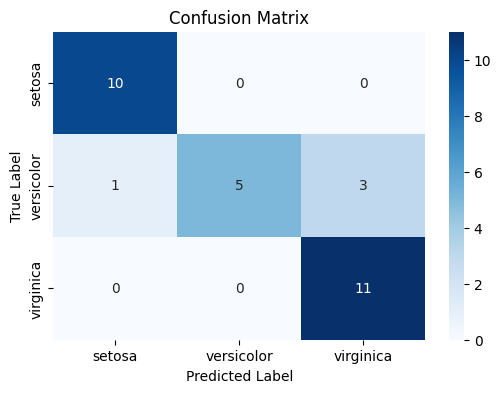

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()